In [1]:
## Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # Many functions for probability distributions in python are in scipy.stats
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Loading the dataset Excel file
data=pd.read_csv('Education+-+Post+12th+Standard.csv')

In [3]:
## Loading the dataset Excel file
pf=pd.read_excel('Data Dictionary (3).xlsx')

In [4]:
pf.head()

,1) Names: Names of various university and colleges
0,2) Apps: Number of applications received
1,3) Accept: Number of applications accepted
2,4) Enroll: Number of new students enrolled
3,5) Top10perc: Percentage of new students ...
4,6) Top25perc: Percentage of new students ...


In [5]:
pf.columns

Index(['1)      Names: Names of various university and colleges'], dtype='object')

In [6]:
# View the top 5 rows of the data
data.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [7]:
data.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [8]:
# Rename the column names with special characters

data.rename(columns={'F.Undergrad':'F_Undergrad', 'P.Undergrad': 'P_Undergrad','Room.Board':'Room_Board', 'S.F.Ratio':'S_F_Ratio', 'perc.alumni':'perc_alumni', 'Grad.Rate':'Grad_Rate'}, inplace=True)


In [9]:
# View the frist 5 rows od the data
data.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [10]:
# Check shape of the dataset
data.shape

(777, 18)

In [11]:
# Check the dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F_Undergrad  777 non-null    int64  
 7   P_Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room_Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S_F_Ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad_Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [12]:
data["Names"].unique()
data.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [13]:
# Check for missing value in any other column

data.isna().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F_Undergrad    0
P_Undergrad    0
Outstate       0
Room_Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S_F_Ratio      0
perc_alumni    0
Expend         0
Grad_Rate      0
dtype: int64

In [14]:
# Check for duplicate data

dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data[dups]

Number of duplicate rows = 0


,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate


In [15]:
# View the data summary of numeric features (.T just transposes the information and is done for better readability)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F_Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P_Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room_Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


#### The describe method will help to see how data has been spread for the numerical values. We can clearly see the minimum value, mean values, different percentile values and maximum values.

In [16]:
# Lets also get the summary of categorical features
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Names,777,777,Abilene Christian University,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Apps,777.0,NaN,NaN,NaN,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,NaN,NaN,NaN,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,NaN,NaN,NaN,779.972973,929.17619,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,NaN,NaN,NaN,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,NaN,NaN,NaN,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F_Undergrad,777.0,NaN,NaN,NaN,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P_Undergrad,777.0,NaN,NaN,NaN,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,NaN,NaN,NaN,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room_Board,777.0,NaN,NaN,NaN,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0


## Univariate Analysis

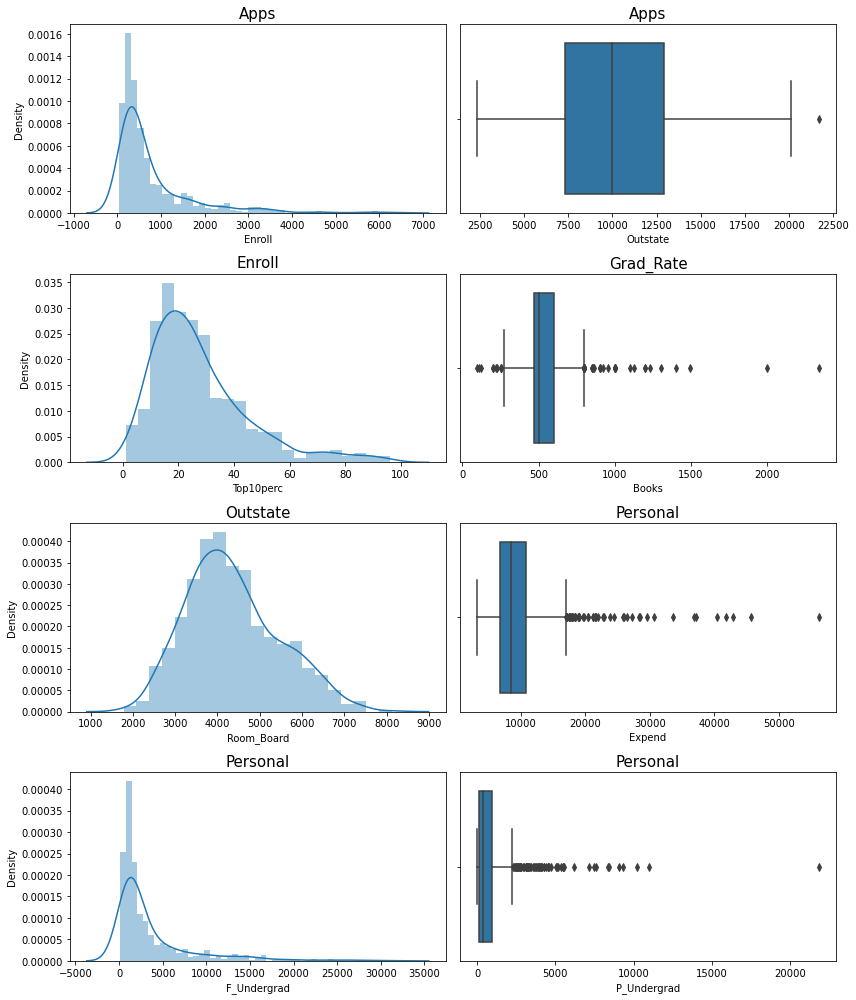

In [17]:
## Univariate except class column

fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(data['Enroll'] , ax=axes[0][0])
a.set_title("Apps",fontsize=15)
a = sns.boxplot(data['Outstate'] , ax=axes[0][1])
a.set_title("Apps",fontsize=15)

a = sns.distplot(data['Top10perc'] , ax=axes[1][0])
a.set_title("Enroll",fontsize=15)

a = sns.boxplot(data['Books'] , ax=axes[1][1])
a.set_title("Grad_Rate",fontsize=15)

a = sns.distplot(data['Room_Board'] , ax=axes[2][0])
a.set_title("Outstate",fontsize=15)

a = sns.boxplot(data['Expend']  , ax=axes[2][1])
a.set_title("Personal",fontsize=15)


a = sns.distplot(data['F_Undergrad'] , ax=axes[3][0])
a.set_title("Personal",fontsize=15)

a = sns.boxplot(data['P_Undergrad']  , ax=axes[3][1])
a.set_title("Personal",fontsize=15)

plt.tight_layout()
plt.show()


In [18]:
data.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F_Undergrad', 'P_Undergrad', 'Outstate', 'Room_Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S_F_Ratio', 'perc_alumni', 'Expend',
       'Grad_Rate'],
      dtype='object')

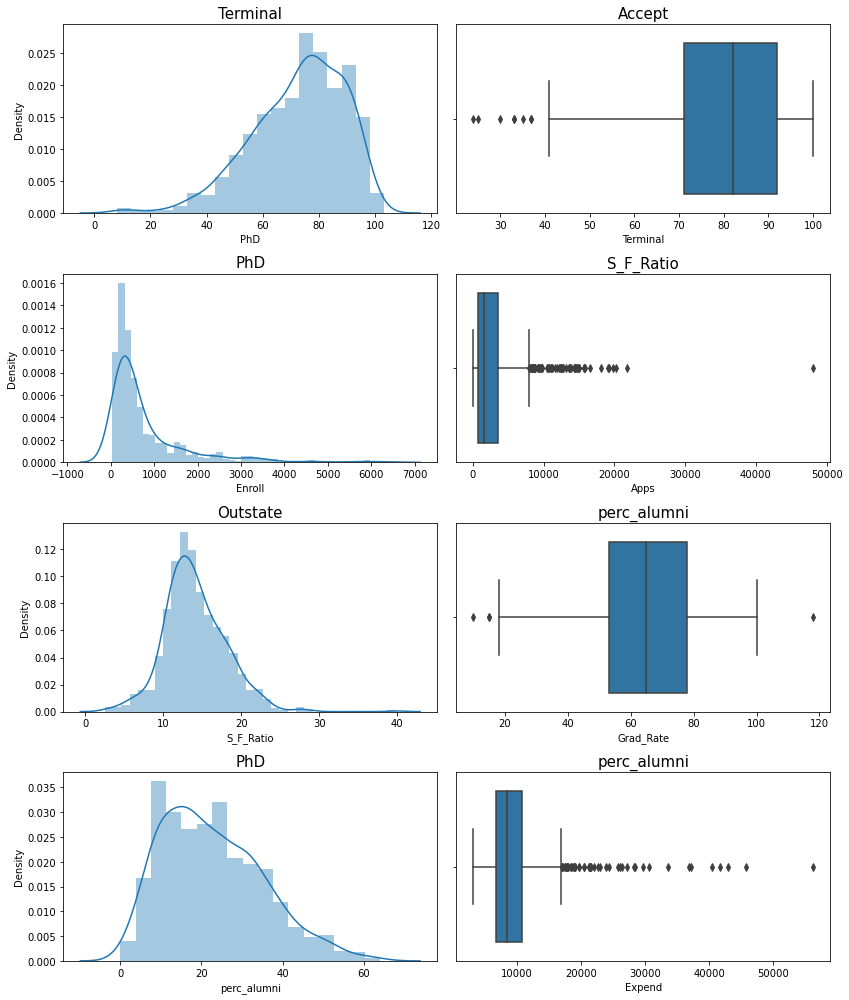

In [19]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(data['PhD'] , ax=axes[0][0])
a.set_title("Terminal",fontsize=15)
a = sns.boxplot(data['Terminal']  , ax=axes[0][1])
a.set_title("Accept",fontsize=15)

a = sns.distplot(data['Enroll'] , ax=axes[1][0])
a.set_title("PhD",fontsize=15)

a = sns.boxplot(data['Apps']  , ax=axes[1][1])
a.set_title("S_F_Ratio",fontsize=15)

a = sns.distplot(data['S_F_Ratio'] , ax=axes[2][0])
a.set_title("Outstate",fontsize=15)

a = sns.boxplot(data['Grad_Rate']  , ax=axes[2][1])
a.set_title("perc_alumni",fontsize=15)


a = sns.distplot(data['perc_alumni'] , ax=axes[3][0])
a.set_title("PhD",fontsize=15)

a = sns.boxplot(data['Expend']  , ax=axes[3][1])
a.set_title("perc_alumni",fontsize=15)

plt.tight_layout()
plt.show()


## Bivariate Analysis

In [20]:
# Bi- Variate Analysis:
# Check for correlation of variable

data.corr(method='pearson')

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F_Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P_Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room_Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


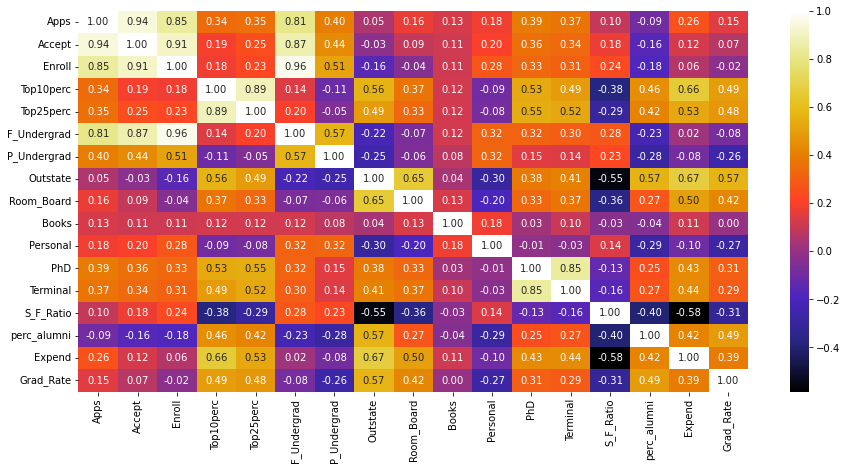

In [21]:
# plot the correlation coefficients as a heatmap

plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(), annot=True,fmt='.2f',cmap='CMRmap')
plt.show()

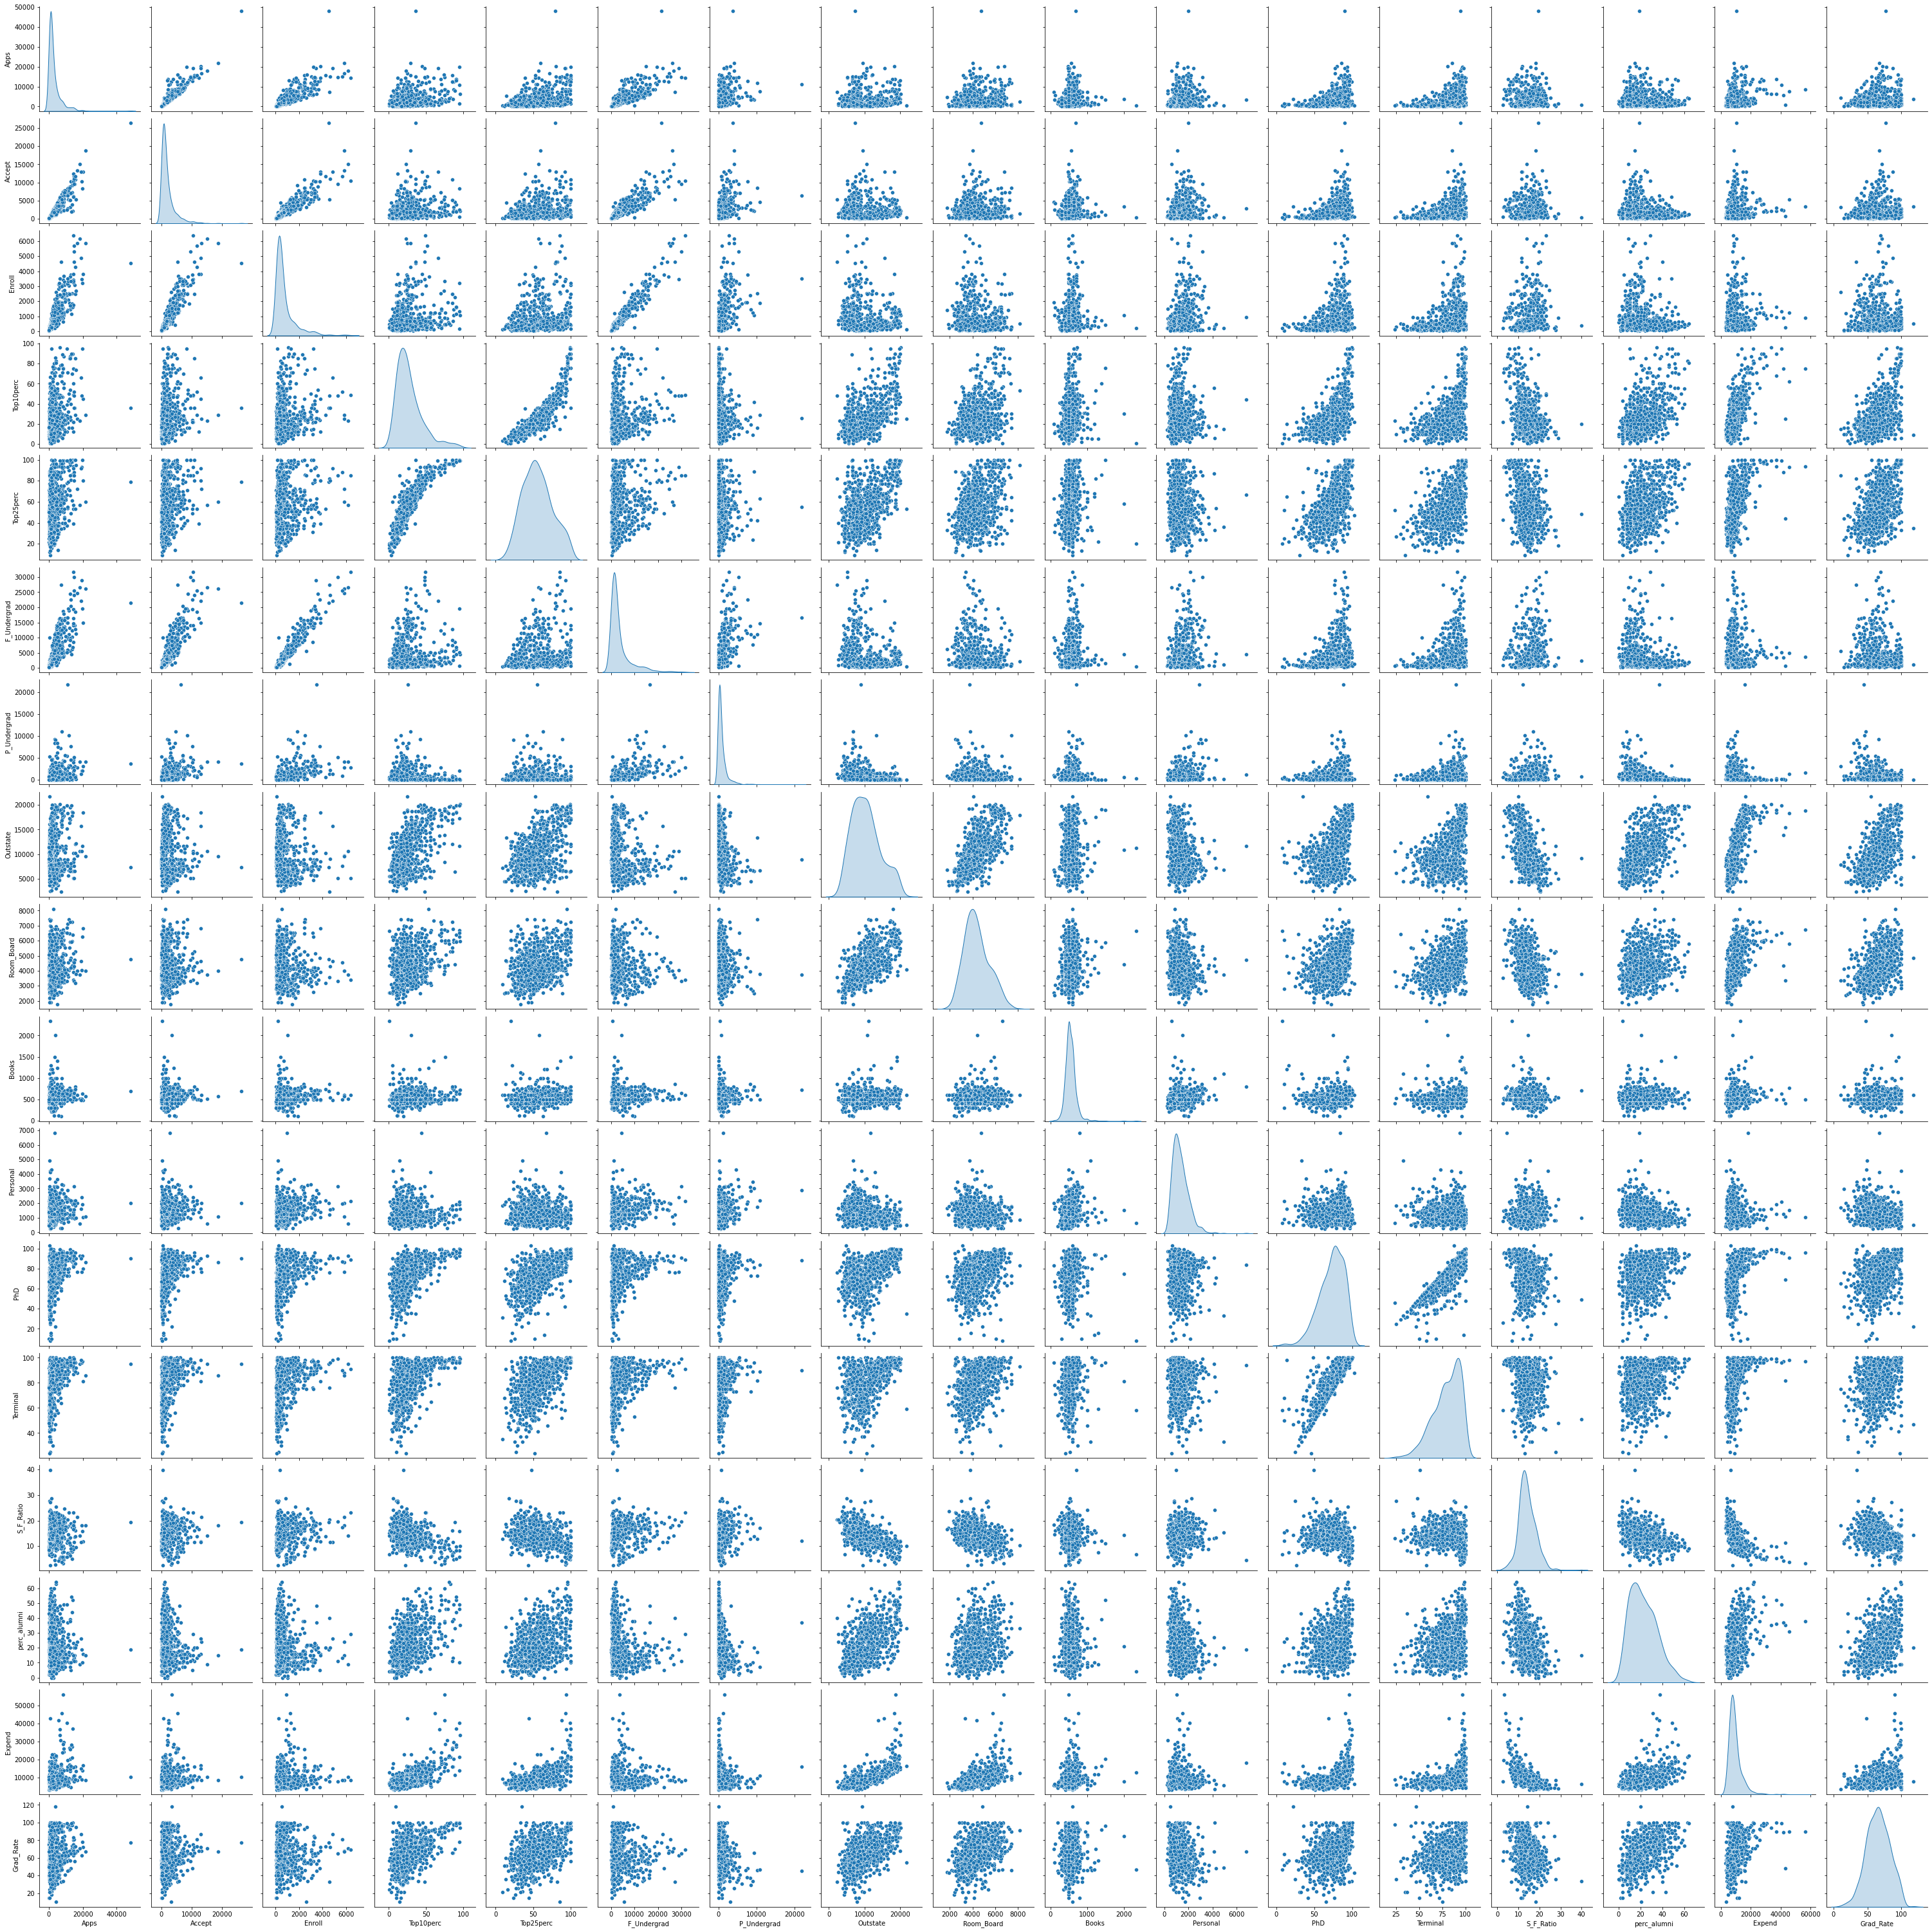

In [22]:
## Plotting pairplot

sns.pairplot(data, diag_kind='kde')
plt.show()

#### To detect outliers and treating them

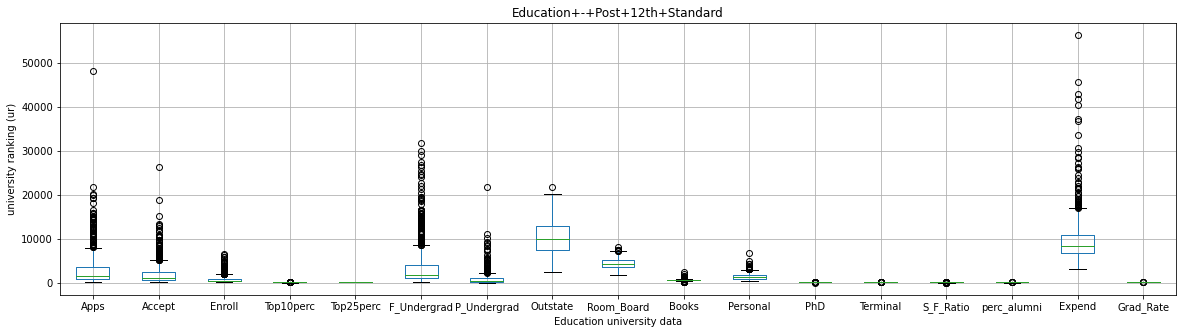

In [23]:
## To find outlier by plotting boxplot

plt.figure(figsize = (20, 5))
plt.title('Education+-+Post+12th+Standard')
plt.xlabel("Education university data")
plt.ylabel("university ranking (ur)")
data.boxplot() 
plt.show()


In [24]:
def detect_limits(col):
  sorted (col)
  Q1, Q3= np.percentile(col,[25,75])
  IQR = Q3 - Q1
  min = Q1 - (1.5 * IQR)
  max = Q3 + (1.5 * IQR)
  return min, max

In [25]:
detect_limits(data.Apps)

(-3496.0, 7896.0)

In [26]:
#lr, ur = detect_limits(data.Apps)
#data['Apps'] = np.where(data['Apps'] > ur, ur, data['Apps'] )
#data['Apps'] = np.where(data['Apps'] < lr, lr, data['Apps'] )

In [27]:
#for i in data:
#    lr, ur = detect_limits(data[i])
#data[i] = np.where(data[i] > ur, ur, data[i] )
#data[i] = np.where(data[i] < lr, lr, data[i] )

In [28]:
lr, ur = detect_limits(data.Expend)
data['Expend'] = np.where(data['Expend'] > ur, ur, data['Expend'] )
data['Expend'] = np.where(data['Expend'] < lr, lr, data['Expend'] )

lr, ur = detect_limits(data.Accept)
data['Accept'] = np.where(data['Accept'] > ur, ur, data['Accept'] )
data['Accept'] = np.where(data['Accept'] < lr, lr, data['Accept'] )

lr, ur = detect_limits(data.Enroll)
data['Enroll'] = np.where(data['Enroll'] > ur, ur, data['Enroll'] )
data['Enroll'] = np.where(data['Enroll'] < lr, lr, data['Enroll'] )

lr, ur = detect_limits(data.F_Undergrad)
data['F_Undergrad'] = np.where(data['F_Undergrad'] > ur, ur, data['F_Undergrad'] )
data['F_Undergrad'] = np.where(data['F_Undergrad'] < lr, lr, data['F_Undergrad'] )

lr, ur = detect_limits(data.P_Undergrad)
data['P_Undergrad'] = np.where(data['P_Undergrad'] > ur, ur, data['P_Undergrad'] )
data['P_Undergrad'] = np.where(data['P_Undergrad'] < lr, lr, data['P_Undergrad'] )

lr, ur = detect_limits(data.Outstate)
data['Outstate'] = np.where(data['Outstate'] > ur, ur, data['Outstate'] )
data['Outstate'] = np.where(data['Outstate'] < lr, lr, data['Outstate'] )

lr, ur = detect_limits(data.Room_Board)
data['Room_Board'] = np.where(data['Room_Board'] > ur, ur, data['Room_Board'] )
data['Room_Board'] = np.where(data['Room_Board'] < lr, lr, data['Room_Board'] )

lr, ur = detect_limits(data.Books)
data['Books'] = np.where(data['Books'] > ur, ur, data['Books'] )
data['Books'] = np.where(data['Books'] < lr, lr, data['Books'] )

lr, ur = detect_limits(data.Personal)
data['Personal'] = np.where(data['Personal'] > ur, ur, data['Personal'] )
data['Personal'] = np.where(data['Personal'] < lr, lr, data['Personal'] )

lr, ur = detect_limits(data.Outstate)
data['Outstate'] = np.where(data['Outstate'] > ur, ur, data['Outstate'] )
data['Outstate'] = np.where(data['Outstate'] < lr, lr, data['Outstate'] )

lr, ur = detect_limits(data.Apps)
data['Apps'] = np.where(data['Apps'] > ur, ur, data['Apps'] )
data['Apps'] = np.where(data['Apps'] < lr, lr, data['Apps'] )


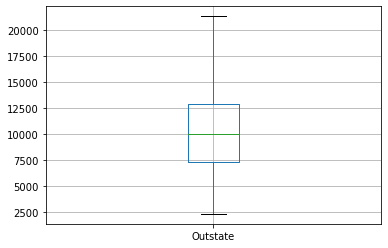

In [29]:
## To find outlier by plotting boxplot

data.boxplot(column=['Outstate'])
plt.show()

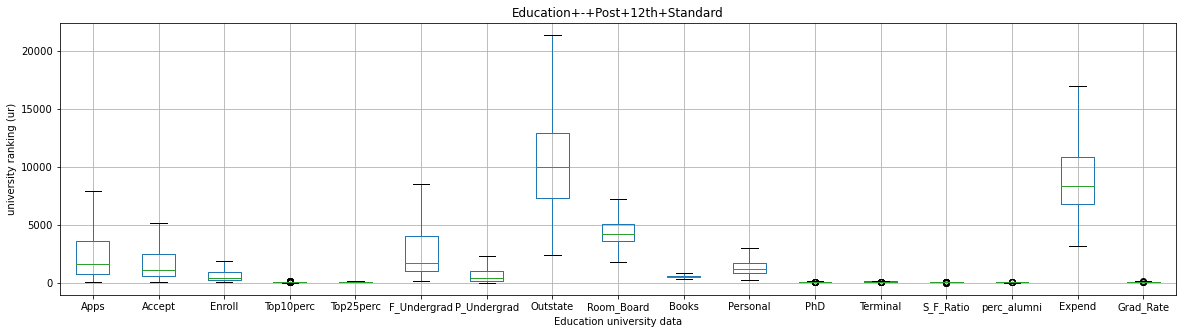

In [30]:
## To find outlier by plotting boxplot

plt.figure(figsize = (20, 5))
plt.title('Education+-+Post+12th+Standard')
plt.xlabel("Education university data")
plt.ylabel("university ranking (ur)")
data.boxplot() 
plt.show()

In [31]:
# Check for NULL values (pick up only the features where null value > 0)

data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

In [32]:
# To find missing values

data.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F_Undergrad    0
P_Undergrad    0
Outstate       0
Room_Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S_F_Ratio      0
perc_alumni    0
Expend         0
Grad_Rate      0
dtype: int64

#### We observe from the graphs that the plots have outliers

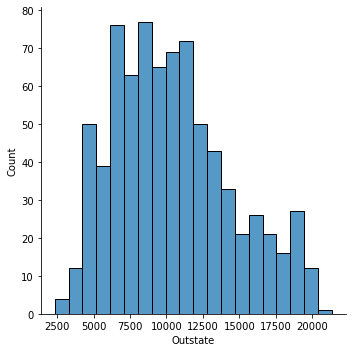

In [33]:
# Histogram of Outstate

sns.displot(data.Outstate,bins=20)  

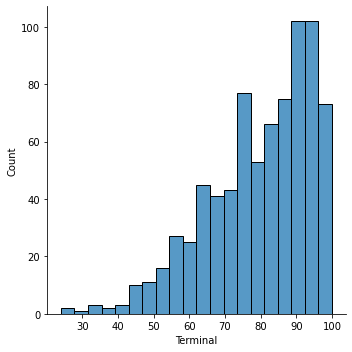

In [34]:
# Histogram of Terminal

sns.displot(data.Terminal,bins=20)  
plt.show()

<AxesSubplot:xlabel='Room_Board', ylabel='Count'>

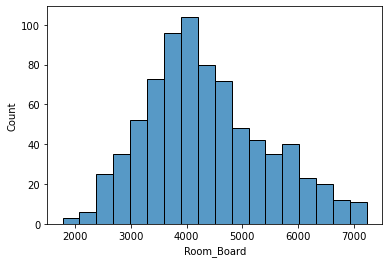

In [35]:
### Plotting histogram plot 

sns.histplot(data.Room_Board) 

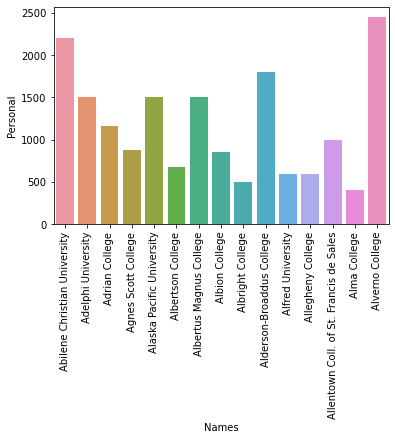

In [36]:
### Plotting barplot plot 

sns.barplot(x='Names', y='Personal', data= data.head(15))
plt.xticks(rotation = 'vertical') # Rotates X-Axis Ticks by 45-degrees
plt.show()

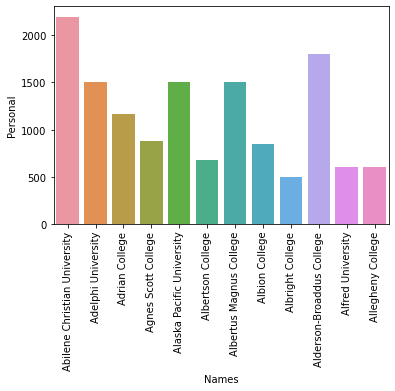

In [37]:
### Plotting barplot plot 

sns.barplot(x='Names', y='Personal', data= data.head(12))
plt.xticks(rotation = 'vertical') 
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

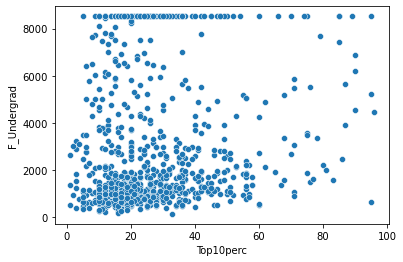

In [38]:
### Plotting scatterplot plot 

sns.scatterplot(x='Top10perc', y= 'F_Undergrad', data= data)
plt.show

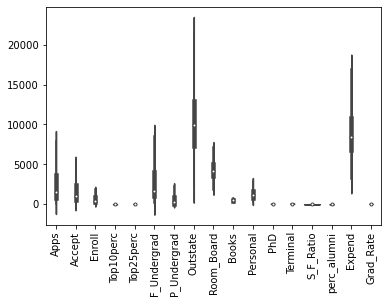

In [39]:
### Plotting violin plot plot

sns.violinplot(data = data, size = 15)
plt.xticks(rotation = 'vertical') 
plt.show()

#### To find PCA 

In [40]:
# Perform bi variate analysis including correlation, pairplots and state the inferences.¶
# Check for correlation of variable

data.corr(method='pearson')

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
Apps,1.000000,0.955307,0.896883,0.346157,0.364491,0.861002,0.519823,0.065337,0.187475,0.236138,0.229948,0.457815,0.430973,0.113822,-0.099903,0.242935,0.150364
Accept,0.955307,1.000000,0.935277,0.227713,0.273681,0.897034,0.572691,-0.005002,0.119586,0.208705,0.256346,0.421975,0.400309,0.173067,-0.165227,0.161808,0.078699
Enroll,0.896883,0.935277,1.000000,0.189966,0.230434,0.967302,0.641595,-0.155655,-0.023846,0.202057,0.339348,0.377460,0.352047,0.258800,-0.222172,0.054221,-0.024062
Top10perc,0.346157,0.227713,0.189966,1.000000,0.891995,0.128652,-0.175795,0.562530,0.371642,0.163335,-0.104337,0.531828,0.491135,-0.384875,0.455485,0.664336,0.494989
Top25perc,0.364491,0.273681,0.230434,0.891995,1.000000,0.181196,-0.099295,0.489569,0.330987,0.169761,-0.086810,0.545862,0.524749,-0.294629,0.417864,0.572905,0.477281
F_Undergrad,0.861002,0.897034,0.967302,0.128652,0.181196,1.000000,0.696130,-0.226166,-0.054476,0.207879,0.359783,0.357549,0.332853,0.308648,-0.284742,0.000371,-0.082535
P_Undergrad,0.519823,0.572691,0.641595,-0.175795,-0.099295,0.696130,1.000000,-0.354216,-0.067638,0.122529,0.344053,0.127995,0.121260,0.358651,-0.418667,-0.201929,-0.265694
Outstate,0.065337,-0.005002,-0.155655,0.562530,0.489569,-0.226166,-0.354216,1.000000,0.655489,0.005110,-0.325609,0.383378,0.408281,-0.554882,0.566349,0.775328,0.571547
Room_Board,0.187475,0.119586,-0.023846,0.371642,0.330987,-0.054476,-0.067638,0.655489,1.000000,0.108924,-0.219554,0.330132,0.375234,-0.362930,0.272246,0.580622,0.425420
Books,0.236138,0.208705,0.202057,0.163335,0.169761,0.207879,0.122529,0.005110,0.108924,1.000000,0.239863,0.125204,0.155217,-0.000991,-0.042576,0.149983,-0.008223


In [41]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables


In [ ]:
# Let us check for pair plots

sns.pairplot(data, diag_kind='kde')

In [ ]:
data.head()

In [ ]:
# Drop and variables
data = data.drop(['Names'], axis =1)

data.head()

In [ ]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

In [ ]:
# Scales the data. Essentially returns the z-scores of every attribute

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

In [ ]:
# All variables are on same scale, hence we can omit scaling.
# But to standardize the process we will do it here

from scipy.stats import zscore
data = data.apply(zscore)
data.head()

In [ ]:
data.boxplot(figsize=(20,3))

In [ ]:
# Create a covariance matrix for identifying Principal components
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(data.T)
print('Covariance Matrix \n%s', cov_matrix)

In [ ]:
# Identify eigen values and eigen vector
# Step 2- Get eigen values and eigen vector

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)


In [ ]:
# Find variance and cumulative variance by each eigen vector
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)


In [ ]:
# To plot variance
plt.plot(var_exp)
plt.show

#### From the above plot we can observe that their is steep drop in variance explained with increase in number of PC's

In [ ]:
# Ploting

plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()


In [ ]:
# Use PCA command from sklearn and find Principal Components. Transform data to components formed
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 7 PCA dimensions (dimensionality reduction from 9 to 7)

pca = PCA(n_components=7)
data_reduced = pca.fit_transform(data)
data_reduced.transpose()


In [ ]:
pca.components_

In [ ]:
# Find correlation between components and features

df_comp = pd.DataFrame(pca.components_,columns=list(data))
df_comp.head()

In [ ]:
# Plotting Heatmap

plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [ ]:
# Find the Cumulative Variance explanation of Eigenvalues
from statsmodels.multivariate.pca import PCA

# NOTE - we are generating only 4 PCA dimensions (dimensionality reduction from 18 to 4)

pc = PCA(data, 
         ncomp=18,
         standardize=True, 
         demean=True, 
         normalize=True, 
         gls=False, 
         weights=None, 
         method='svd', 
         missing=None)


In [ ]:
eig_vals= pc.eigenvals

In [ ]:
pc.eigenvecs

In [ ]:
## Calculating Correlation
data.corr()

### Correlation Heatmap

In [ ]:
## Plotting Heatmap

plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

In [ ]:
### Plotting scatter plot

sns.scatterplot(data= data)
plt.figure(figsize=(12,7))
plt.show()
